<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325">Tensorflow & Keras</h1>

In [1]:
import numpy as np
from numpy.random import seed, choice
import matplotlib.pyplot as plt

## Cargando Tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

## Redes Neuronales Para clasificación

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
categories = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

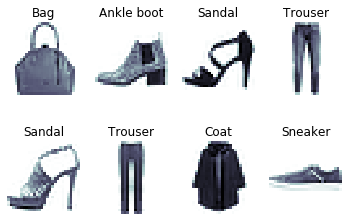

In [5]:
seed(314)
N, *_ = y_train.shape
indices = np.arange(N, dtype=int)
test_ix = choice(indices, 8)

fig, ax = plt.subplots(2, 4)
ax = ax.ravel()
for axi, ix in zip(ax, test_ix):
    axi.imshow(X_train[ix], cmap="bone_r")
    cat = categories[y_train[ix]]
    axi.set_title(cat)
    axi.axis("off")

## Un Primer Feed-Forward Neural Network

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

In [ ]:
X_train.shape

### Paso 1: Definiendo la arquitectura

In [ ]:
Xin = Input(shape=(28, 28))
X = Flatten()(Xin)
X = Dense(350, activation="relu")(X)
X = Dense(100, activation="relu")(X)
X = Dense(10, activation="softmax")(X)

model = Model(inputs=Xin, outputs=X)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 350)               274750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               35100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 310,860
Trainable params: 310,860
Non-trainable params: 0
_________________________________________________________________


### Paso 2: compilando el modelo 

In [10]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), # equiv "sgd"
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### Paso 3: Entrenar modelo

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Training with large minibatches is bad for your health.<br>More importantly, it&#39;s bad for your test error.<br>Friends dont let friends use minibatches larger than 32. <a href="https://t.co/hxx2rGhIG1">https://t.co/hxx2rGhIG1</a></p>&mdash; Yann LeCun (@ylecun) <a href="https://twitter.com/ylecun/status/989610208497360896?ref_src=twsrc%5Etfw">April 26, 2018</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [ ]:
# second version: X_train / 255.0
model.fit(x=X_train, y=y_train, epochs=30, batch_size=30)

**Dentro de Colab**:

```python
%tensorflow_version 2.x
%load_ext tensorboard
```